## Lesson 4 - Differential equations

**Authors:**
* Yilber Fabian Bautista
* Alejandro Cruz-Osorio
* Keiwan Jamaly
* Sean Tulin

Differential equations are ubiquitous in physics, and moreover come in many different types. 
Depending on whether you have ordinary or partial differential equations, an initial value problem or boundary value problem, linear or nonlinear equations, and depending on the order, there are different methods and tools for finding solutions.

Here we learn how to solve an initial value problems (IVP) for ordinary differential equations (ODEs). That is, we are solving for function(s) of one independent variable (say, time $t$), where the boundary condition(s) are imposed at some initial time $t_0$ and we are solving for what happens at later times $t > t_0$.
The numerical methods described here can be applied to linear or nonlinear systems of ODEs of *any order*.

There is an existing function `scipy.integrate.solve_ivp` within the scipy library that does this already. It is recommended that you use this function for all your IVP needs. We also describe some of the theoretical background for numerical solutions to IVPs to provide some greater context for how `scipy.integrate.solve_ivp` works.

**Objectives:** 

By the end of this lecture you will be able to:

* Use the **Euler** and **Runge-Kutta** methods to solve numerically IVPs for ODEs.
* Solve first-order and higher-order ODEs using `scipy.integrate.solve_ivp`.

## Introduction: Euler method

Imagine we want to calculate the shape of an unknown curve which starts at a given point $A_0$ at $t_0$ and satisfies a given differential equation. The Euler method is the simplest algorithm for solving such a problem. 
It approximates the unknown curve as follows:

Starting at the initial value $A_0$ at $t_0$, from the differential equation we can compute the slope of a tangent line to the curve at $t_0$, and so, the tangent line itself. 
We then take a small step along our  tangent line until we reach the point $A_1$ at $t_1$. For a $t$-step small enough, the slope of the curve does not change too much in this $t$-displacement and therefore $A_1$ is still close to the curve. We can then repeat the reasoning as for $A_0$, that is,  taking $A_1$ as our initial value, and from the differential equation compute the slope of a tangent line to the curve at $t_1$, then move along the new tangent line until reaching $A_2$ at $t_2$. The process is then repeated until we reach the final time $t_n$, at which we would like to know the value of the unknown value of the  curve $A_n$. 
Schematically this is:

![Euler Example](Figures/Euler_method.png)

Figure taken from  [here](https://en.wikipedia.org/wiki/Euler_method)

The Euler method is a first-order method. This means that the local error (or the error per step) is proportional to the square of the step size, whereas the global error (the error at a given $t$) is proportional to the step size $\Delta t$.

What we just described in words can be made precise with equations. Given an ODE and boundary condition

$$
y'(t) = f(t,y),\quad y(t_0)=y_0,
$$

we choose a value $h$ for the step size so that for $t_i = t_0+i h$, where $i$ in an integer counting how many steps we have taken. After one step in the Euler method, from $t_i$ to $t_{i+1} = t_i+h$, we evaluate $y(t_{i+1}) = y_{i+1}$ by Taylor expanding around $h=0$: 

$$y(t_{i+1}) = y(t_i) + y'(t_i) h +\mathcal{O}(h^2) \, .$$ 

We replace $y'(t_i)$ by the r.h.s. of the differential equation:

$$
y(t_i+1) = y(t_i) + f(t_i,y(t_i)) h +\mathcal{O}(h^2)
$$

or in a index notation

$$
y_{i+1} = y_{i}+ f(t_i,y_i) h +\mathcal{O}(h^2)
$$

As an example, if the differential equation is

$$y'(t) = -y(t)$$

we can set the function $f(t, y)$ to be

$$f(t,y) = -y(t) \, .$$

In [1]:
import numpy as np

def Euler(t_min,t_max,n,y_0):
    #Define a t-array
    t = np.linspace(t_min,t_max, num=n)
    #step size
    h = t[1] - t[0]
    #Initialize an array to save the values of y
    y = np.zeros(n)
    #Set initial condition
    y[0] = y_0
    #write the Euler method
    for i in range(n - 1):
        y[i+1] = y[i] + h*(-y[i])
    
    return y

Let us now use the method in an specific example

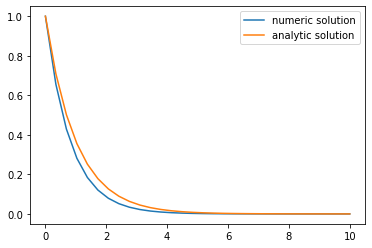

In [2]:
import matplotlib.pyplot as plt

t_min = 0.
t_max = 10.
n = 30 # Total number of steps
y_0 = 1.


#use Euler method
sol = Euler(t_min,t_max,n,y_0)

#compare to the analytic solution y[t] = Exp(-t)
t = np.linspace(t_min,t_max, num=n)
a_sol = np.exp(-t)

#plot the findings

plt.plot(t, sol, label="numeric solution")
plt.plot(t, a_sol, label="analytic solution")
plt.legend()
plt.show()

## Exercise 1
Use the **Euler** method previously programed and vary the total number of steps $n$,  What happens for different step sizes?  Plot your findings using a `for` loop.

In [ ]:
# write your solution here

## Exercise 2
- Generalize the `Euler()` function defined above to take as input a general function $f(y,t)$ which is the function in the  r.h.s. of the differential equation: 
```
Euler(f, t_min, t_max, n, y_0)
```
- As before, use your new `Euler()` function to solve for $f(y,t) = -y(t)$, with $y_0=1$. Your solution should agree with the previous results. 
- Using your new `Euler()` function, solve the differential equation
    $$y'(t) = \sin(t)+y(t)$$
with initial condition $$y(0) = 2. $$
in the time interval $[0,10]$

In [ ]:
# write your solution in here 

## Runge-Kutta method

The Euler method is a first-order approximation and is less accurate than higher-order methods for a fixed step size. Therefore, to achieve a desired accuracy in a numerical calculation, the Euler method requires many more steps (and therefore much longer computing time) while a higher-order method can be much more efficient.

For better approximations, we can use [Runge-Kutta (RK) methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods). RK4 is a *fourth-order* numerical solution, which means that the local error (per step) is $\mathcal{O}(h^5)$ and the global error (after all steps) is $\mathcal{O}(h^4)$.

Let's describe how the algorithm works. Here is our ODE and boundary condition:

$$ y'(t) = f(t,y),\quad y(t_0)=y_0 $$

Similar to the Euler method, you define a step size $h$ and then iterate from $y_0$ to $y_1$ to $y_2$, etc. From each step $t_i$ and $y_i$, the subsequent step is computed as

$$y_{i+1} = y_i + h\left( \frac{k_1}{6} + \frac{k_2}{3} + \frac{k_3}{3} + \frac{k_4}{6} \right)$$

where $k_1, k_2, k_3, k_4$ are 

\begin{align*}
k_1 &= f(t_i,y_i) \\
k_2 &= f(t_i+\frac{h}{2}, y_i + \frac{h}{2} k_1) \\
k_3 &= f(t_i+\frac{h}{2}, y_i + \frac{h}{2} k_2) \\
k_4 &= f(t_i+h, y_i + h k_3) \, .
\end{align*} 

It is rather complicated to show that the errors do indeed cancel out up to $\mathcal{O}(h^5)$, so we omit it here.

Note that for each step we have to evaluate $f(t,y)$ *four times*, whereas for the Euler method we only evaluated $f(t,y)$ *once* per step. This is a generic feature of higher-order methods: each step requires more function evaluations (more computing time), but because it is more accurate, much fewer steps are required to achieve the same accuracy.

## Exercise 3 (optional)
1. Similar to Exercise 1, create a program `Runge_Kutta()` that implements this method for a general input function $f(y,t)$.
2. Use your Runge_Kutta() function to solve the differential equation
 $$y'(t) = \sin(t)+y(t)$$
with initial condition $$y(0) = 2. $$
in the time interval $[0,10]$. Plot your findings and compare them with the solution from the Euler method for different t-resolutions  

In [ ]:
# here goes your solution

## ODE solvers in `scipy` library

Now that we have gain some intuition on how numeric methods for solving first order differential equations work, we want to take advantage of existing methods in the `scipy` library. There are two ODE solvers: [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) and [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). `odeint` is outdated so we will not show it here, but there are good examples in the documentation and later on in case you are working with old code bases.

### `solve_ivp`

`scipy.integrate.solve_ivp` implements many methods for solving IVPs, which can be chosen by the user (see [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)). 


The default method is **RK45** with an adaptive step size $h$ that is adjusted automatically to maintain a desired level of accuracy for each step. In this method, the solver performs both RK4 and RK5 for each step, comparing the results to estimate the error-per-step. If the error falls within the desired error tolerance, the solver continues iterating. If the error is too large, the solver tries again with a smaller $h$. 

We will now give an example of how to use `solve_ivp`. Say we want to solve the differential equation 

$$
y'(t) = y_0 - k y
$$

where $k$ is a constant. First, we rewrite the equation in the generic form $y'(t) = f(t,y)$ where

$$
f(t, y) = y_0 - k y \, .
$$

The syntax for solving ODEs using `solve_ivp` is the following:

```py
scipy.integrate.solve_ivp(fun, t_span, y0)
```

* `fun`: function $f(t,y)$ that returns the derivative of $y$. Note `fun(t,y)` must have two arguments: the first argument is the *independent* variable `t`, the second argument is the *dependent* variable `y`
* `t_span`: range `[t0,tf]` where $t_0$ is the initial time and $t_f$ is the final time
* `y0`: initial condition. Note `y0` *must be a list or array*. If we are solving for just one function, we would write `[y0]` as the initial condition.


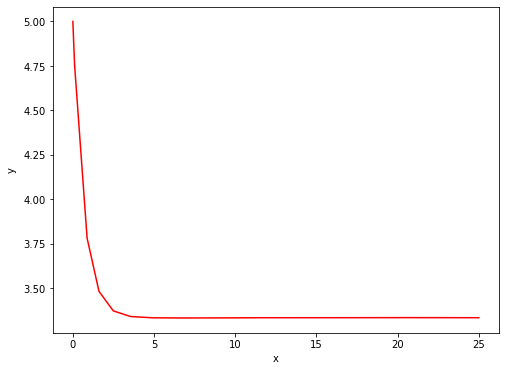

In [3]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# initial condition
y_0 = 5

k = 1.5

# Function that returns the right hand side of the ODE dy/dt = y'[t]
# Note the order of the arguments in the definition is important
def f(t,y):
    dydt = -k * y + y_0
    return dydt

# solve ODE
result = integrate.solve_ivp(f, [0,25], [y_0])

# plot results
fig = plt.figure(figsize=(8,6))
plt.plot(result.t, result.y[0], 'r')
plt.xlabel(r'$\rm x$')
plt.ylabel(r'$\rm y$')
plt.show()

What exactly does `solve_ivp` return? Let's check by evaluating its type:

In [6]:
type(result)

scipy.integrate._ivp.ivp.OdeResult

This object named `result` organizes our numerical solution. (To be more precise, it is an instance of a class.)
We can call the information contained therein with the following syntax:

- `result.t` returns a list of $t$ values between $t_0$ and $t_f$
- `result.y` returns a list of $y(t)$ values at those $t$ values. In general, we need to index *which* function we want to return, so we write `result.y[0]` to get the first function. If we were solving for two functions, they would be `result.y[0]` and `result.y[1]`.


## Second-order ODEs

`solve_ivp` can be used to solve higher-order IVPs. If we have an ODE of order $n$, we simply need to rewrite it as a system of $n$ coupled first-order ODEs.

For instance, imagine we want to solve the following second-order ODE

\begin{equation*}
x''(t) = x'(t) + x(t)
\end{equation*}

We can define a new function $v(x) = x'(t)$ to rewrite the equations in the following form:

\begin{align*}
x'(t) &= v(t) \\
v'(t) &= - v(t) - x(t)\,.
\end{align*}

With this in mind, we can rewrite the coupled differential equation to the form

\begin{align*}
y'(t) = f(t, y)
\end{align*}

where

$$
y(t) = 
\left(\begin{array}{cc} 
x(t) \\ 
v(t)
\end{array}\right)
$$ 

and
$$
f(t,y) = 
\left(\begin{array}{cc} 
v(t) \\
- v(t) - x(t)
\end{array}\right) \, .
$$

The following example shows how to solve this system from $t_0 = 0$ to $t_f = 8$, with initial conditions

$$x(0) = 0 , \quad v(0) = -1 \, .$$

Note the following:
- `f(t,y)` takes as input a *list* or *array* for `y`, and it returns a list of the same dimensions as `y`. Note again the ordering of the arguments `t,y` is important.
- `t_span` is $[t_0,t_f] = [0,8]$
- The initial condition `y0` is written as a list of values $(x(t_0), v(t_0))$ for each of the functions we are solving for.


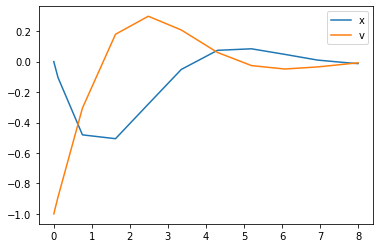

In [14]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Right hand side of the ODE
def f(t, y):
    x, v = y
    dydt = [v, -v - x]
    return dydt

#Solve the system of ODEs
result = solve_ivp(f, [0, 8], [0, -1])

#Plot the results
plt.plot(result.t, result.y[0], label='x')
plt.plot(result.t, result.y[1], label='v')

plt.legend()
plt.show()

As you can see, this look a little chunky. This is because `solve_ivp` only returns certain $t$ values. If you want `solve_ivp` to return more $t$ values, you have to specify this ahead of time using the `t_eval` argument. Now the plot is much nicer. 

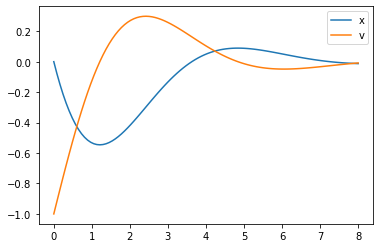

In [15]:
import numpy as np

t = np.linspace(0, 8, 100)

result = solve_ivp(f, [0, 8], [0, -1], t_eval=t)

#Plot the results
plt.plot(result.t, result.y[0], label='x')
plt.plot(result.t, result.y[1], label='v')

plt.legend()
plt.show()

Note that including more points in `t_eval` does *not* change the accuracy of the calculation. It is simply a matter of how many points are reported by the solver. Typically, many more $t$ values are evaluated when the algorithm is run, as needed to achieve the level of accuracy, but these are hidden.

Before we leave this example, it is useful to note that we can write $f(t,y)$ in a matrix form to make the calculation more compact. The function

$$
f(t,y) = 
\left(\begin{array}{cc} 
v(t) \\
- v(t) - x(t)
\end{array}\right)
$$

can be rewritten as a matrix vector multiplication

$$
f(t,y) = 
\left(\begin{array}{cc} 
0 & 1 \\
-1 & -1
\end{array}\right)
y(t)
$$

With this, we can simplify the implementation of our ODE solution.

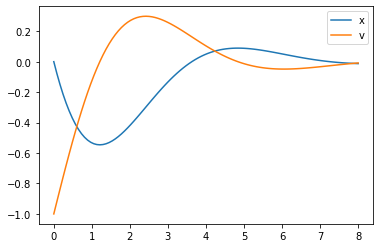

In [16]:
A = np.array([[0, 1], [-1, -1]])

def f(t, y):
    return A.dot(y)

t = np.linspace(0, 8, 100)

result = solve_ivp(f, [0, 8], [0, -1], t_eval=t)

plt.plot(result.t, result.y[0], label='x')
plt.plot(result.t, result.y[1], label='v')

plt.legend()
plt.show()

## Exercise 4

We want to solve a classical harmonic oscillator.

\begin{align*}
\frac{d^2\theta(t)}{dt^2} &= - \frac{g}{\ell} \theta(t) 
\end{align*}

Without loss of generality, we can set $g/\ell = 1$ for convenience and we have

\begin{align*}
\frac{d^2\theta(t)}{dt^2} &= - \theta(t)
\end{align*}

Your tasks are:
1. Solve the IVP using `solve_ivp`, with initial condition $\theta(0) = \pi/4$ and $\dot{\theta}(0) = 0$. And plot your results. 
2. Calculate the period. Here you can be creative for finding the period. 
3. Compare the numerical solution with the analytical one. 

In [ ]:
# Write your solution here

## Example: more coupled differential equations

As a last example for Runge-Kutta, we want to solve the coupled differential equation. Let's imagine two frictionless point masses, connected by a spring which is relax at distance $d$. This system can be described by the following differential equation:

\begin{align*}
\frac{d^2x_1}{dt^2} + \omega^2 (x_1(t) - x_2(t) - d) &= 0 \\
\frac{d^2x_2}{dt^2} + \omega^2 (x_2(t) - x_1(t) + d) &= 0
\end{align*}

We write these two second order differential equations as 4 first order differential equations by defining $v_1 = x'_1$ and $v_2 = x'_2$:
\begin{align*}
x_1'(t) &= v_1(t) \\
x_2'(t) &= v_2(t) \\
v_1'(t) &= - \omega^2 (x_1(t) - x_2(t) - d) \\
v_2'(t) &= - \omega^2 (x_2(t) - x_1(t) + d)
\end{align*}

As you can see, this equation is an inhomogeneous system. 

So we get for $f(t,y)$ and $y(t)$:
$$
y(t) = 
\left(\begin{array}{cc} 
x_1(t) \\ 
x_2(t) \\
v_1(t) \\
v_2(t)
\end{array}\right)
$$ 

and
$$
f(t,y) = 
\left(\begin{array}{cccc} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
- \omega^2 & \omega^2 & 0 & 0 \\
\omega^2 & -\omega^2 & 0 & 0  \\
\end{array} \right)
y(t)
+ \omega^2
\left(\begin{array}{c}
0 \\ 0 \\ -d \\ d
\end{array}\right)
$$

We solve the couple differential equations for $\omega = 1$, $d = 1$, $x_1(0) = d/2$, $x_2(0) = -d/2$, $x'_1(0) = 1$ and $x'_2(0) = 0$. 


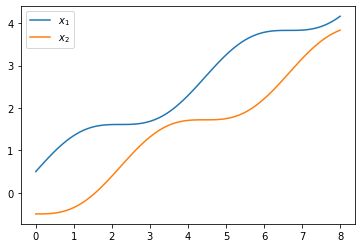

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

d = 1
omega = 1
t = np.linspace(0, 8, 100)

B = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [-omega**2, omega**2, 0, 0],
              [omega**2, -omega**2, 0, 0]])

def f(t, y):
    return B.dot(y) - omega**2 * np.array([0, 0, -d, d])

result = solve_ivp(f, [0, 8], [d/2, -d/2, 1, 0], t_eval=t)

plt.plot(result.t, result.y[0], label=r'$x_1$')
plt.plot(result.t, result.y[1], label=r'$x_2$')
plt.legend()

## Exercise 5 (Optional)

With this exercise, we put everything together, what we have learned so far. We imagine two frictionless point masses, which are connected by a spring. In contrast to previous example, the left point mass is also connected to a solid wall. The system is described by the following differential equation:

\begin{align*}
\frac{d^2x_1}{dt^2} + \omega_1^2 (x_1(t) - x_2(t) - d_1) + \omega_2^2 (x_1(t) - d_2) &= 0 \\
\frac{d^2x_2}{dt^2} + \omega_1^2 (x_2(t) - x_1(t) + d_1) &= 0
\end{align*}

Solve the these equations for $\omega_1 = 1$, $\omega_2 = 1$, $d_1 = 1$, $d_2 = 1$, $x_1(0) = d_1$, $x_2(0) = d_1 + d_2$, $x'_1(0) = 1$ and $x'_2(0) = 0$.

In [ ]:
# your solution goes in here